In [1]:
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import numpy as np
import pywt

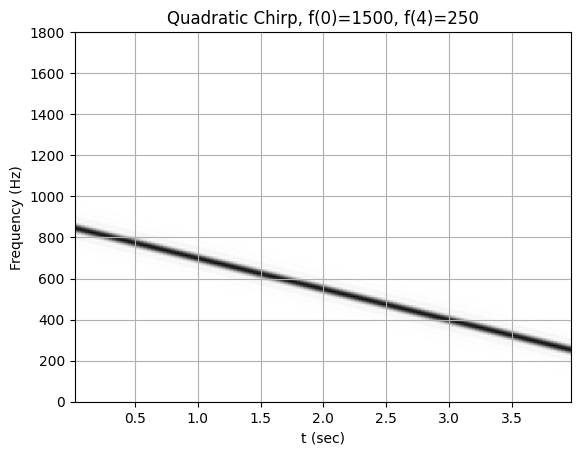

In [3]:
fs = 7200
T = 4
t = np.arange(0, int(T*fs)) / fs

def plot_spectrogram(title, w, fs):
    ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=256, nfft=576)
    plt.pcolormesh(tt, ff[:145], Sxx[:145], cmap='gray_r', shading='gouraud')
    plt.title(title)
    plt.xlabel('t (sec)')
    plt.ylabel('Frequency (Hz)')
    plt.grid()

w = chirp(t, f0=850, f1=250, t1=T, method='linear')
plot_spectrogram(f'Quadratic Chirp, f(0)=1500, f({T})=250', w, fs)
plt.show()

In [4]:
from ssqueezepy.utils import p2up
def _scales(len_x, nv=32):
    N = p2up(len_x)[0]
    noct = np.log2(N) - 1
    n_scales = int(noct * nv)
    return np.power(2 ** (1 / nv), np.arange(1, n_scales + 1))

widths = _scales(len(w))
scale2frequency = pywt.scale2frequency('cmor2-0.796', widths)/(1/fs)
print(scale2frequency)
print(f'Widths = {widths}.')
print(f'Corresponding equivalent frequencies = {scale2frequency}.')

cwtmatr, freqs = pywt.cwt(w, widths, 'cmor2-0.796', 1/fs)
plot_vals = abs(cwtmatr)
print(cwtmatr)
im = plt.imshow(plot_vals, cmap='PRGn', aspect='auto',
                # extent=[t[0], t[-1], 1, 31],
                vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max(),
                interpolation = 'hanning')
# plt.gca().invert_yaxis()

[5.72464656e+03 5.60197919e+03 5.48194033e+03 5.36447365e+03
 5.24952404e+03 5.13703757e+03 5.02696145e+03 4.91924403e+03
 4.81383477e+03 4.71068422e+03 4.60974397e+03 4.51096666e+03
 4.41430595e+03 4.31971648e+03 4.22715386e+03 4.13657467e+03
 4.04793640e+03 3.96119747e+03 3.87631718e+03 3.79325570e+03
 3.71197405e+03 3.63243410e+03 3.55459853e+03 3.47843081e+03
 3.40389521e+03 3.33095676e+03 3.25958122e+03 3.18973512e+03
 3.12138567e+03 3.05450081e+03 2.98904916e+03 2.92500000e+03
 2.86232328e+03 2.80098960e+03 2.74097016e+03 2.68223683e+03
 2.62476202e+03 2.56851878e+03 2.51348072e+03 2.45962201e+03
 2.40691739e+03 2.35534211e+03 2.30487199e+03 2.25548333e+03
 2.20715298e+03 2.15985824e+03 2.11357693e+03 2.06828733e+03
 2.02396820e+03 1.98059874e+03 1.93815859e+03 1.89662785e+03
 1.85598702e+03 1.81621705e+03 1.77729926e+03 1.73921541e+03
 1.70194761e+03 1.66547838e+03 1.62979061e+03 1.59486756e+03
 1.56069284e+03 1.52725041e+03 1.49452458e+03 1.46250000e+03
 1.43116164e+03 1.400494

KeyboardInterrupt: 

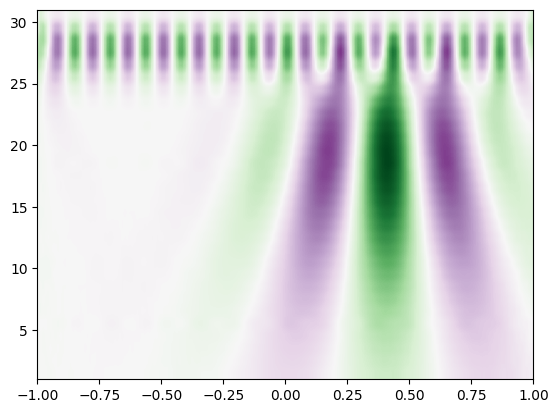

In [ ]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
plt.show() 

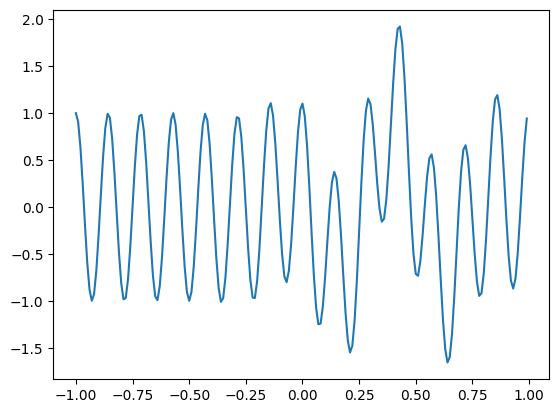

In [ ]:
plt.plot(t,sig)

C:\Users\afons\AppData\Local\Temp\ipykernel_3812\4095505716.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=200).
  plt.specgram(sig)


(array([[6.57448618e-04],
        [2.04041855e-02],
        [3.20309621e-01],
        [2.00178053e+00],
        [5.88823252e+00],
        [8.84487772e+00],
        [7.04001322e+00],
        [2.88052356e+00],
        [5.15665242e-01],
        [1.88912566e-02],
        [8.30582621e-03],
        [1.16850030e-02],
        [1.44558604e-02],
        [2.46570049e-02],
        [4.96429984e-02],
        [9.91096822e-02],
        [1.88846463e-01],
        [1.45162819e+01],
        [3.70380608e+01],
        [1.01370730e+01],
        [1.25500537e-01],
        [8.72644039e-02],
        [6.06225025e-02],
        [3.88278897e-02],
        [2.53639984e-02],
        [1.87855280e-02],
        [1.54879253e-02],
        [1.29773425e-02],
        [1.06782511e-02],
        [8.88999231e-03],
        [7.70872287e-03],
        [6.86209572e-03],
        [6.09473938e-03],
        [5.38737353e-03],
        [4.82286201e-03],
        [4.40133040e-03],
        [4.04325131e-03],
        [3.70001768e-03],
        [3.3

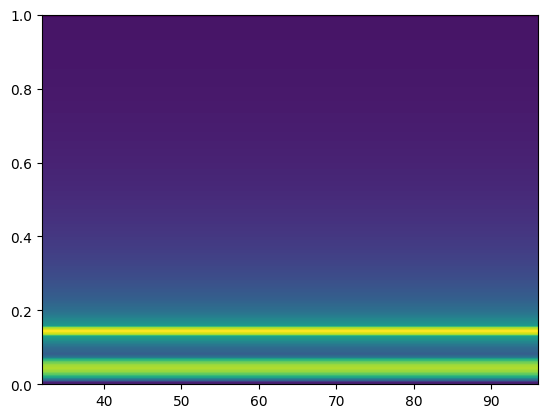

In [ ]:
plt.specgram(sig)

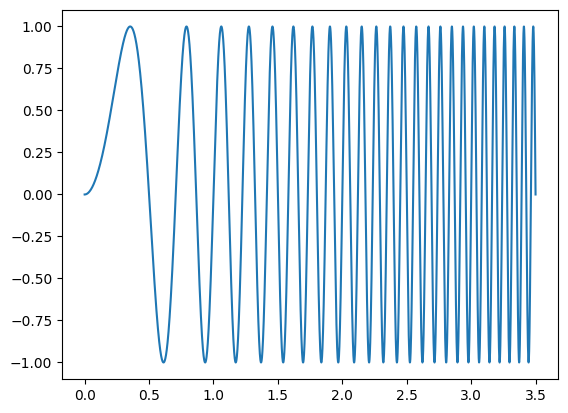

In [ ]:
t = np.linspace(0, 3.5, 10000)
w = np.sin(2 * np.pi * (2*t) * t)
plt.plot(t,w)

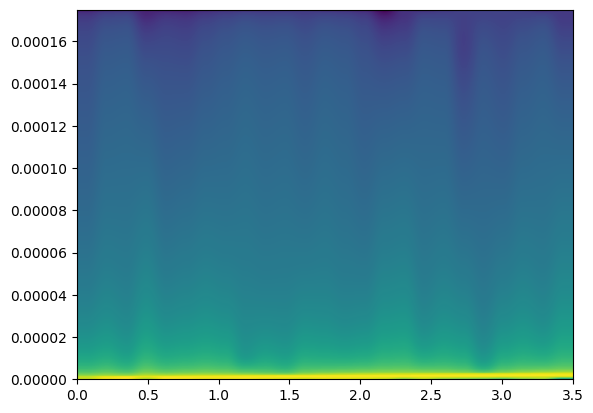

In [ ]:
fig, ax1 = plt.subplots()
fs = t[1]-t[0]
Pxx, freqs, bins, im = plt.specgram(w, Fs=fs, NFFT = 256*2, cmap='viridis',
interpolation = None, xextent = (t[0], t[-1]))

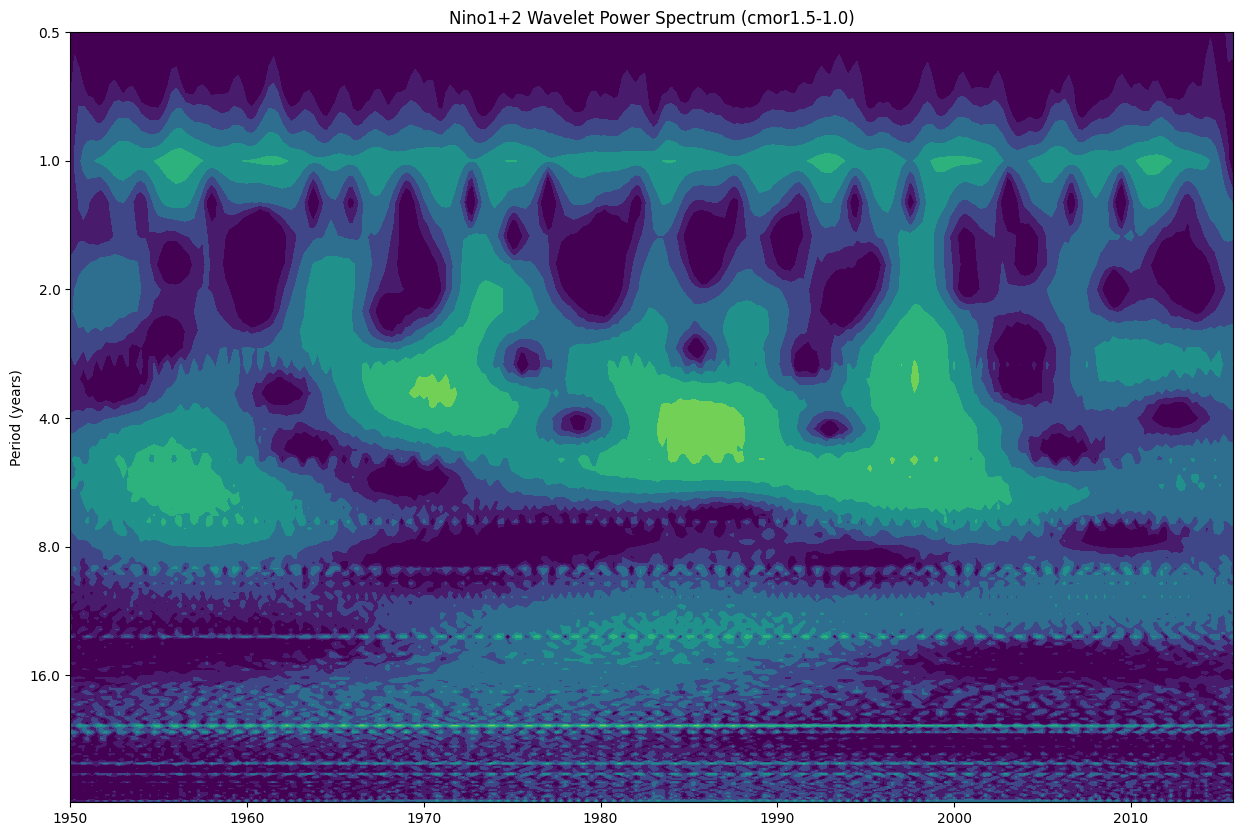

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pywt

time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title('%s Wavelet Power Spectrum (%s)' % ('Nino1+2', wavelet))
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()

# MOST RECENT!

In [2]:
import pylab
import matplotlib.pyplot as plt
import numpy as np
import pywt

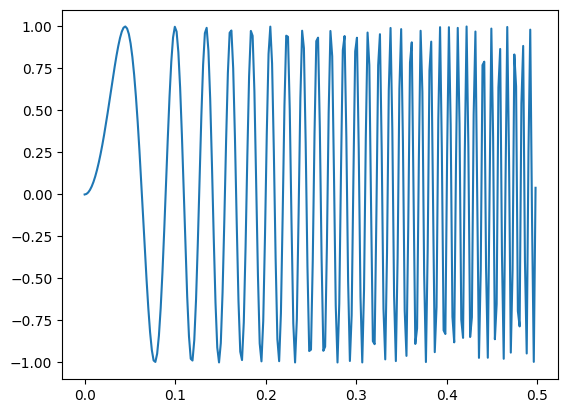

In [1]:
x = pylab.arange(0, 0.5, 1. / 512)
data = pylab.sin((5 * 50 * pylab.pi * x ** 2))
plt.plot(x,data)

(17, 15) (17,) (15,)


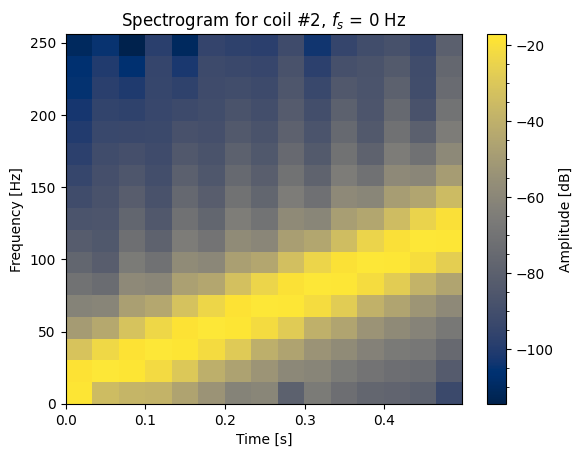

In [2]:
# Setup figures

# This property is related to the Heisenberg uncertainty principle, but not directly – see Gabor limit for discussion.
# The product of the standard deviation in time and frequency is limited. The boundary of the uncertainty principle 
# (best simultaneous resolution of both) is reached with a Gaussian window function (or mask function), as the Gaussian
#  minimizes the Fourier uncertainty principle. This is called the Gabor transform (and with modifications for multiresolution 
# becomes the Morlet wavelet transform).

fig, ax1 = plt.subplots()

Pxx, freqs, bins, im = plt.specgram(data, NFFT=32, Fs=512, noverlap=int(32/2), cmap='cividis',
interpolation = None, xextent = (x[0], x[-1]) )
# This uses STFT: Short-Time Fourier Transform.

# Debugging:
print(Pxx.shape, freqs.shape, bins.shape)

cbar = plt.colorbar(im, label = r'Amplitude [dB]') # Power spectral density amplitude!
cbar.minorticks_on()
plt.title(r'Spectrogram for coil #2, $f_{s}$' + f' = {0:.0f} Hz')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

# plt.axis((41.5, 44.5, 0, 120e3)) # Chosen interval!
# plt.savefig('Coil2_Spectrogram.svg', format = 'svg')
plt.show()

0.001953125
[208.         195.76470588 184.88888889 175.15789474 166.4
 158.47619048 151.27272727 144.69565217 138.66666667 133.12
 128.         123.25925926 118.85714286 114.75862069 110.93333333
 107.35483871 104.         100.84848485  97.88235294  95.08571429
  92.44444444  89.94594595  87.57894737  85.33333333  83.2
  81.17073171  79.23809524  77.39534884  75.63636364  73.95555556
  72.34782609  70.80851064  69.33333333  67.91836735  66.56
  65.25490196  64.          62.79245283  61.62962963  60.50909091
  59.42857143  58.38596491  57.37931034  56.40677966  55.46666667
  54.55737705  53.67741935  52.82539683  52.          51.2
  50.42424242  49.67164179  48.94117647  48.23188406  47.54285714
  46.87323944  46.22222222  45.5890411   44.97297297  44.37333333
  43.78947368  43.22077922  42.66666667  42.12658228  41.6
  41.08641975  40.58536585  40.09638554  39.61904762  39.15294118
  38.69767442  38.25287356  37.81818182  37.39325843  36.97777778
  36.57142857  36.17391304  35.7849462

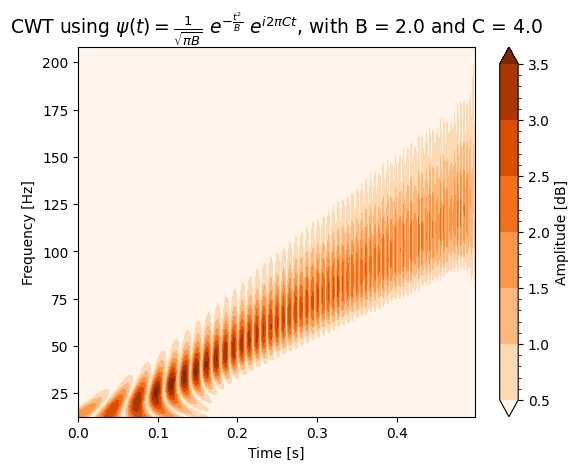

In [3]:
t = x
sig  = data

n = len(sig)
scale_list = np.arange(start=8, stop=n) / 8 + 1 

sampling_period = t[1] - t[0]
print(sampling_period)

cwtmatr, freqs = pywt.cwt(sig, scale_list, 'morl', sampling_period)
print(freqs)
# power = (abs(cwtmatr)) **2
power = abs(cwtmatr) 

# result = np.where(power > 0.0000000001, power, -10)
# power = 10*np.log10(result, out=result, where=result > 0)

im = plt.contourf(x, freqs, power, extend='both',cmap='Oranges',
vmax=power.max(), vmin=power.min(),
extent = [t[0], t[-1], freqs[-1], freqs[1]],
origin = 'lower')

cbar = plt.colorbar(im, label = r'Amplitude [dB]') # Power spectral density amplitude!
cbar.minorticks_on()

plt.title(r'CWT using $\psi(t) = \frac{1}{\sqrt{\pi B}}$ $e^{-\frac{t^2}{B}}$ $e^{i2\pi Ct}$, with B = 2.0 and C = 4.0', fontsize=13.5)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')

plt.show() # This is sort of similar to what we got before (using the STFT)!

In [3]:
from scipy.io import readsav

data_dict = readsav('save_85925_H305.sav')
print(f'JET data read: {data_dict}.')

data_JET = data_dict['h305']
time_JET = data_dict['t_h305']

JET data read: {'h305': array([-0.00427246,  0.00061035,  0.00183106, ..., -0.03448489,
        0.05554203,  0.00823975], dtype=float32), 't_h305': array([41.3     , 41.300003, 41.300003, ..., 44.699997, 44.7     ,
       44.7     ], dtype=float32)}.


In [15]:
sampling_period = 1e-6 # See note above!
fs = 1e6

# COULD TRY TO BREAK THE SIGNAL DOWN INTO SMALLER SEGMENTS AND COMPUTE DE CWT FOR EACH ONE, KINDA LIKE THE STFT. (???)
# AFTERWARDS, JUST JOIN THE RESULTS, WHO KNOWS?


wavelet = 'cmor10.0-1.0'

# scale_list = _scales(len(data_JET), nv=1)

scale_list = np.array([2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 32, 64])
# scale_list = np.concatenate(([2, 4], np.linspace(5, 15, 59), [16, 32, 64]))

# from ssqueezepy.utils import p2up
# def _scales(len_x, nv=32):
#     N = p2up(len_x)[0]
#     noct = np.log2(N) - 1
#     n_scales = int(noct * nv)
#     return np.power(2 ** (1 / nv), np.arange(1, n_scales + 1))
# scale_list = _scales(len(data_JET), nv=8)

print(f'scale_list.shape = {scale_list.shape}.')
print(f'Final widths = {scale_list}.')
print(f'Final frequencies = {pywt.scale2frequency(wavelet, scale_list)/sampling_period}.')

scale_list.shape = (16,).
Final widths = [ 2  4  5  6  7  8  9 10 11 12 13 14 15 16 32 64].
Final frequencies = [500000.         250000.         200000.         166666.66666667
 142857.14285714 125000.         111111.11111111 100000.
  90909.09090909  83333.33333333  76923.07692308  71428.57142857
  66666.66666667  62500.          31250.          15625.        ].


Step1 done: freqs = [500000.         250000.         200000.         166666.66666667
 142857.14285714 125000.         111111.11111111 100000.
  90909.09090909  83333.33333333  76923.07692308  71428.57142857
  66666.66666667  62500.          31250.          15625.        ].
Step2 done: Plotted.


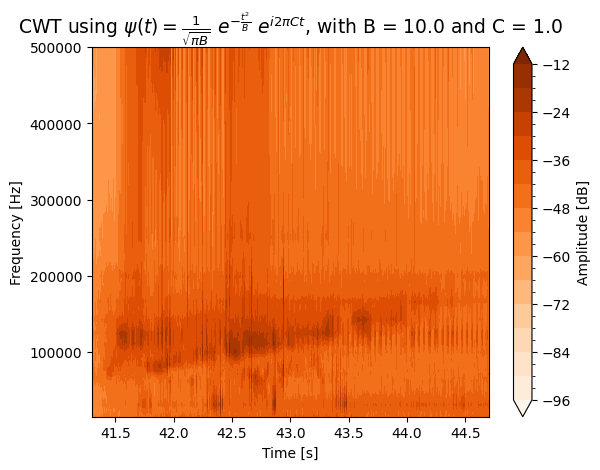

In [11]:
cwtmatr, freqs = pywt.cwt(data_JET, scale_list, wavelet, sampling_period)
print(f'Step1 done: freqs = {freqs}.')
power = (abs(cwtmatr)) **2

result = np.where(power > 0.0000000001, power, -10)
power = 10*np.log10(result, out=result, where=result > 0)

im = plt.contourf(time_JET, freqs, power, extend='both',cmap='Oranges',
vmax=power.max(), vmin=power.min(),
extent = [time_JET[0], time_JET[-1], freqs[-1], freqs[0]], # Shouldn't this be 0 instead of 1? freqs[0]!
origin = 'lower', levels = 16)
print(f'Step2 done: Plotted.')

cbar = plt.colorbar(im, label = r'Amplitude [dB]') # Power spectral density amplitude!
cbar.minorticks_on()

plt.title(r'CWT using $\psi(t) = \frac{1}{\sqrt{\pi B}}$ $e^{-\frac{t^2}{B}}$ $e^{i2\pi Ct}$, with B = 10.0 and C = 1.0', fontsize=13.5)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')

plt.savefig('My_SpecCWT_JET')

plt.show() # This is sort of similar to what we got before (using the STFT)!

Step1 done: freqs = [500000.         250000.         200000.         166666.66666667
 142857.14285714 125000.         111111.11111111 100000.
  90909.09090909  83333.33333333  76923.07692308  71428.57142857
  66666.66666667  62500.          31250.          15625.        ].
Scales = [ 2  4  5  6  7  8  9 10 11 12 13 14 15 16 32 64].
Step2 done: Plotted.


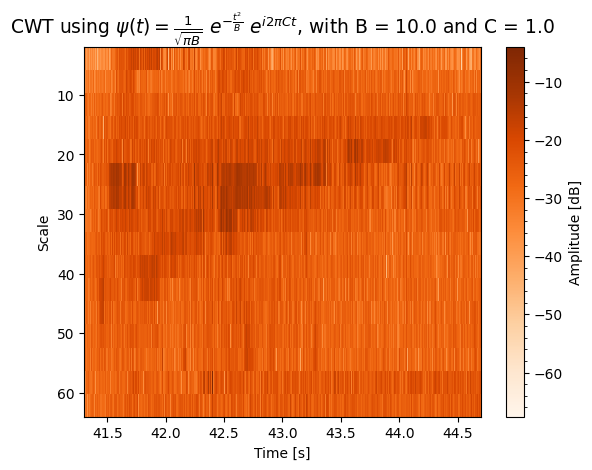

In [16]:
cwtmatr, freqs = pywt.cwt(data_JET, scale_list, wavelet, sampling_period)
print(f'Step1 done: freqs = {freqs}.')
print(f'Scales = {scale_list}.')
power = (abs(cwtmatr)) **1

result = np.where(power > 0.0000000001, power, -10)
power = 10*np.log10(result, out=result, where=result > 0)

im = plt.imshow(power, cmap='Oranges', aspect='auto',
                 vmax=power.max(), vmin=power.min(),
                 extent = [time_JET[0], time_JET[-1], scale_list[-1], scale_list[0]], interpolation = 'nearest')

print(f'Step2 done: Plotted.')

cbar = plt.colorbar(im, label = r'Amplitude [dB]') # Power spectral density amplitude!
cbar.minorticks_on()

plt.title(r'CWT using $\psi(t) = \frac{1}{\sqrt{\pi B}}$ $e^{-\frac{t^2}{B}}$ $e^{i2\pi Ct}$, with B = 10.0 and C = 1.0', fontsize=13.5)
plt.xlabel('Time [s]')
plt.ylabel('Scale')

plt.show() # This is sort of similar to what we got before (using the STFT)!

In [24]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import itertools

xs0 = time_JET
ys0 = freqs
zs0 = power
print(xs0.shape, ys0.shape, zs0.shape)

xi = np.array(list(itertools.product(time_JET,freqs)))


# N = 30j
# extent = (time_JET[0], time_JET[-1], freqs[-1], freqs[0])


# xs,ys = np.mgrid[extent[0]:extent[1]:N, extent[2]:extent[3]:N]

# resampled = griddata((xs0, ys0), zs0, (xs, ys), method = 'linear')

# plt.imshow(resampled.T, extent=extent)
# plt.plot(xs0, ys0, "r.")
# plt.plot(xs, ys, "b.")
# plt.title("imshow for irregularly spaced data using griddata")
# plt.show()

(3400000,) (16,) (16, 3400000)


In [26]:
print(xi.shape)
pp = zs0.ravel()
print(pp.shape)

(54400000, 2)
(54400000,)


In [29]:
N = 30j
extent = (time_JET[0], time_JET[-1], freqs[-1], freqs[0])


xs,ys = np.mgrid[extent[0]:extent[1]:N, extent[2]:extent[3]:N]


ValueError: x and y must have same first dimension, but have shapes (3400000,) and (16,)

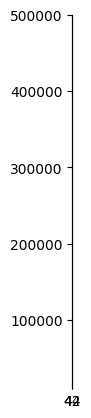

In [30]:
resampled = griddata(xi, pp, (xs, ys), method = 'cubic')

plt.imshow(resampled.T, extent=extent)
plt.plot(xs0, ys0, "r.")
plt.plot(xs, ys, "b.")
plt.title("imshow for irregularly spaced data using griddata")
plt.show()

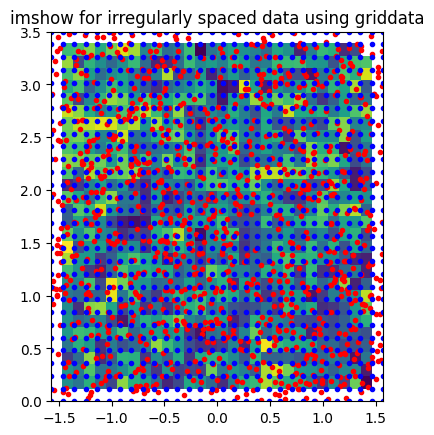

In [13]:
xs0 = np.random.random((1000)) * np.pi - np.pi/2
ys0 = np.random.random((1000)) * 3.5
zs0 = np.random.random((1000))

xi = np.c_[xs0.ravel(),ys0.ravel()]

N = 30j
extent = (-np.pi/2,np.pi/2,0,3.5)

xs,ys = np.mgrid[extent[0]:extent[1]:N, extent[2]:extent[3]:N]

resampled = griddata(xi, zs0, (xs, ys), method = 'linear')

plt.imshow(resampled.T, extent=extent)
plt.plot(xs0, ys0, "r.")
plt.plot(xs, ys, "b.")
plt.title("imshow for irregularly spaced data using griddata")
plt.show()

In [12]:
print(xs0[:10])
print(ys0[:10])
xi = np.c_[xs0.ravel(),ys0.ravel()]
print(xi)

[ 0.0690647   0.36841225 -0.58325981 -0.51786858 -0.43933932  0.64250248
  1.26053393 -0.56383699 -1.03853446  1.02366406]
[1.44506443 0.50650679 1.79745167 2.64206633 2.94794625 3.20658309
 1.54605894 2.37116328 1.16818103 0.58902078]
[[ 0.0690647   1.44506443]
 [ 0.36841225  0.50650679]
 [-0.58325981  1.79745167]
 ...
 [ 1.53604733  0.31274666]
 [ 0.92388984  1.79943104]
 [ 1.27885412  3.13195317]]


# TESTING DWT: (DISCRETE WAVELET TRANSFORM)

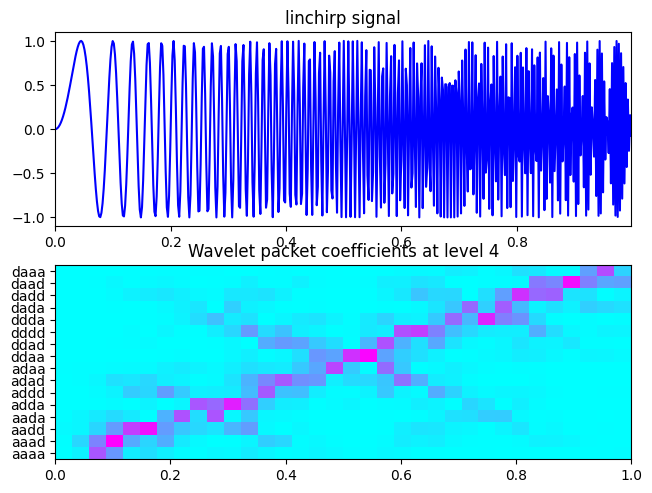

In [22]:
import matplotlib.cm as cm
import pylab

import pywt

x = pylab.arange(0, 1, 1. / 512)
data = pylab.sin((5 * 50 * pylab.pi * x ** 2))

wavelet = 'sym2'
level = 4
order = "freq"  # "normal"
interpolation = 'nearest'
cmap = cm.cool

wp = pywt.WaveletPacket(data, wavelet, 'sym', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = pylab.array([n.data for n in nodes], 'd')
values = abs(values)

f = pylab.figure()
f.subplots_adjust(hspace=0.2, bottom=.03, left=.07, right=.97, top=.92)
pylab.subplot(2, 1, 1)
pylab.title("linchirp signal")
pylab.plot(x, data, 'b')
pylab.xlim(0, x[-1])

ax = pylab.subplot(2, 1, 2)
pylab.title("Wavelet packet coefficients at level %d" % level)
pylab.imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
    origin="lower", extent=[0, 1, 0, len(values)])
pylab.yticks(pylab.arange(0.5, len(labels) + 0.5), labels)
#pylab.setp(ax.get_xticklabels(), visible=False)

#pylab.figure(2)
#pylab.specgram(data, NFFT=64, noverlap=32, cmap=cmap)
#pylab.imshow(values, origin='upper', extent=[-1,1,-1,1],
# interpolation='nearest')

pylab.show()

In [37]:
r_list = pywt.mra(data, wavelet, level=None, axis=-1, transform='dwt', mode='periodization')

In [38]:
print(np.array(r_list).shape)

(8, 512)


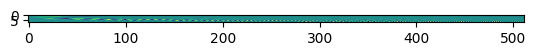

In [39]:
plt.imshow(r_list)

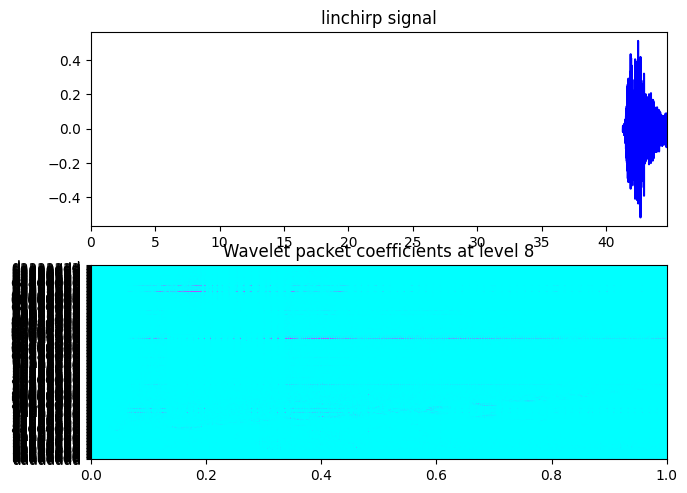

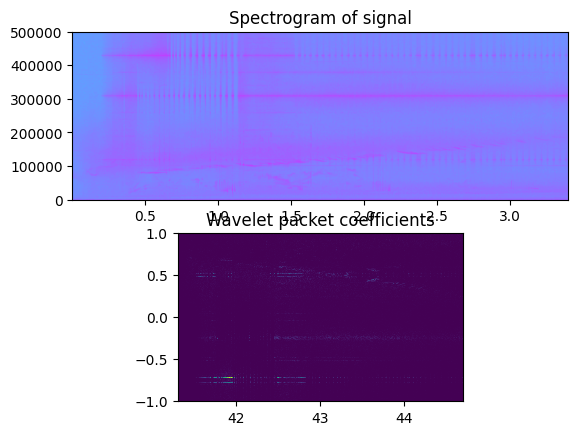

In [4]:
x = time_JET
data = data_JET

wavelet = 'coif5'
level = 8
order = "freq"  # other option is "normal"
interpolation = 'nearest'
cmap = plt.cm.cool

# Construct wavelet packet
wp = pywt.WaveletPacket(data, wavelet, 'symmetric', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = np.array([n.data for n in nodes], 'd')
values = abs(values)

# Show signal and wavelet packet coefficients
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, bottom=.03, left=.07, right=.97, top=.92)
ax = fig.add_subplot(2, 1, 1)
ax.set_title("linchirp signal")
ax.plot(x, data, 'b')
ax.set_xlim(0, x[-1])

ax = fig.add_subplot(2, 1, 2)
ax.set_title("Wavelet packet coefficients at level %d" % level)
ax.imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
          origin="lower", extent=[0, 1, 0, len(values)])
ax.set_yticks(np.arange(0.5, len(labels) + 0.5), labels)

# Show spectrogram and wavelet packet coefficients
fig2 = plt.figure()
ax2 = fig2.add_subplot(211)
ax2.specgram(data, NFFT=4096*2, noverlap=4096, Fs=1e6, cmap=cmap,
             interpolation='bilinear')
ax2.set_title("Spectrogram of signal")
ax3 = fig2.add_subplot(212)
ax3.imshow(values, origin='upper', extent=[x[0], x[-1], -1, 1],
           interpolation='nearest')
ax3.set_title("Wavelet packet coefficients")


plt.show()

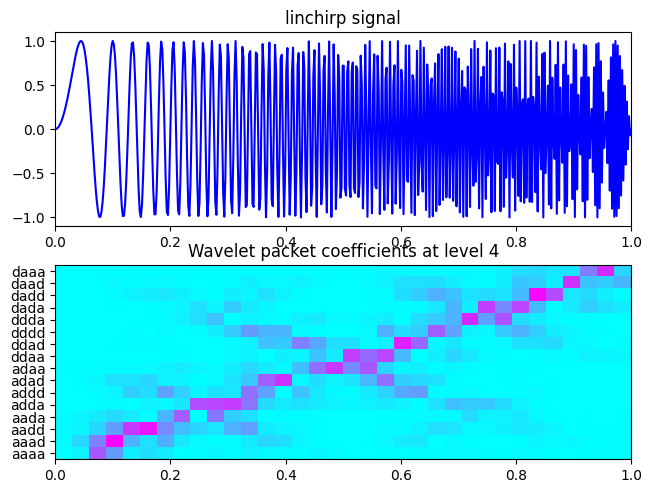

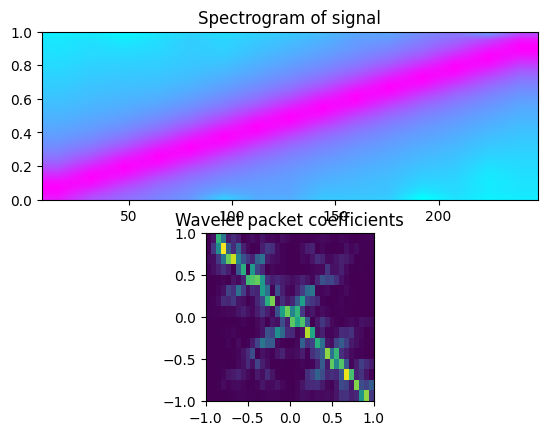

In [43]:
import numpy as np
import matplotlib.pyplot as plt

import pywt


x = np.linspace(0, 1, num=512)
data = np.sin(250 * np.pi * x**2)

wavelet = 'db2'
level = 4
order = "freq"  # other option is "normal"
interpolation = 'nearest'
cmap = plt.cm.cool

# Construct wavelet packet
wp = pywt.WaveletPacket(data, wavelet, 'symmetric', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = np.array([n.data for n in nodes], 'd')
values = abs(values)

# Show signal and wavelet packet coefficients
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, bottom=.03, left=.07, right=.97, top=.92)
ax = fig.add_subplot(2, 1, 1)
ax.set_title("linchirp signal")
ax.plot(x, data, 'b')
ax.set_xlim(0, x[-1])

ax = fig.add_subplot(2, 1, 2)
ax.set_title("Wavelet packet coefficients at level %d" % level)
ax.imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
          origin="lower", extent=[0, 1, 0, len(values)])
ax.set_yticks(np.arange(0.5, len(labels) + 0.5), labels)

# Show spectrogram and wavelet packet coefficients
fig2 = plt.figure()
ax2 = fig2.add_subplot(211)
ax2.specgram(data, NFFT=64, noverlap=32, Fs=2, cmap=cmap,
             interpolation='bilinear')
ax2.set_title("Spectrogram of signal")
ax3 = fig2.add_subplot(212)
ax3.imshow(values, origin='upper', extent=[-1, 1, -1, 1],
           interpolation='nearest')
ax3.set_title("Wavelet packet coefficients")


plt.show()